DSC160 Data Science and the Arts - Twomey - Spring 2020 - [dsc160.roberttwomey.com](http://dsc160.roberttwomey.com)

# Exercise 1: Reading Image Archives (Web-Scraping and Basic Features)

This exercise takes you through the a coarse image-feature based analysis of a famous Abstract Expressionist painter, [Mark Rothko](https://www.biography.com/artist/mark-rothko). Technically, you will build a full workflow from image retrieval from an online archive -> calculation of image features -> visualization of results. Finally, it asks you to reproduce a similar result using a small image data set of your choice. 

The exercise is broken down into two parts:
- [Part 1](#Part-1:-Plotting-Rothko). A replication of an analysis by the Software Studies Initiative/Lev Manovich of Mark Rothko's paintings. 
- [Part 2](#Part-2:-Extension). The second section asks you to extend this work, applying the same methods to analyze an image set (n <= 100) of your choosing. 

Once you have completed both parts, you will submit your completed notebook as a pdf to gradescope for grading.

## Part 1: Plotting Rothko
(30 pts total)

[Mark Rothko](https://www.biography.com/artist/mark-rothko) is a celebrated Abstract Expressionist painter known for his large color field abstractions. Some historians describe a progression towards darker, less colorful compositions over the course of his life. Here, we will recreating plots similar to the plots below from the Software Studies Initiative, showing a distribution of color and brightness within his body of work.

![Rothko and Mondrian in mean brightness vs. saturation Style Space](https://live.staticflickr.com/6070/6074400716_c809d2d7a3_c_d.jpg)
*Data: 128 paintings by Piet Mondrian (1905-1917); 123 paintings by Mark Rothko (1938-1953).
Mapping: The two image plots are placed side by side. In each plot: X-axis: brightness mean; Y-axis: saturation mean.*

From [Mondrian vs Rothko: footprints and evolution in style space](http://lab.softwarestudies.com/2011/06/mondrian-vs-rothko-footprints-and.html)

### 1A. Retrieving Data from a Visual Archive
(5 points)

First you need to retreive images of Rothko's paintings from an online cultural archive. WikiArt has 163 of Rothko's paintings: [https://www.wikiart.org/en/mark-rothko](https://www.wikiart.org/en/mark-rothko). We will retrieve all of these images and store them locally. 

You can model your code on our example notebook for scraping images from WikiArt: [../examples/scrape-wikiart.ipynb](../examples/scrape-wikiart.ipynb)

In [113]:
# Code modeled from ../examples/scrape-wikiart.ipynb
from bs4 import BeautifulSoup
import os
import requests

In [114]:
DATA_DIR = '../data/'
ARTIST_URL = 'https://www.wikiart.org/en/{artist}/all-works/text-list'
PAINTING_URL = 'https://www.wikiart.org{painting_path}'

In [115]:
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [116]:
artist_name = 'mark-rothko'
url_query = ARTIST_URL.format(artist=artist_name)
artist_page = requests.get(url_query)

In [117]:
# check for request error
try:
    artist_page.raise_for_status()
except requests.exceptions.HTTPError as e:
    print("Error trying to retrieve {}".format(artist_page.url))
    raise e

soup = BeautifulSoup(artist_page.text, 'lxml')

In [118]:
IMAGE_DIR = os.path.join(DATA_DIR, artist_name)
if not os.path.exists(IMAGE_DIR):
    os.makedirs(IMAGE_DIR)

In [119]:
painting_paths = []

# retreive all rows in painting-list
for li in soup.find_all('li', {'class': 'painting-list-text-row'}):

    # retrieve all links in the current row
    for link in li.find_all('a'):
        href = link.get('href')
        # store in dictionary
        painting_paths.append(href)

print(len(painting_paths))
# painting_paths

163


In [120]:
def download_and_save(painting_url):
    r_painting_page = requests.get(painting_url)
    soup = BeautifulSoup(r_painting_page.text, 'lxml')
    for img in soup.find_all('img', {'class': 'ms-zoom-cursor'}):
        img_url = img['src']
        img_url = img_url.split('!')[0]
        filename = img_url.split('/')[-1]

        outfile = os.path.join(IMAGE_DIR, filename)                       
        if not os.path.exists(outfile):                        
            print("downloading {}: {}".format(filename, img_url))
            r = requests.get(img_url, outfile)
            with open(outfile, 'wb') as f:
                f.write(r.content)
        else:
            #print("skipping {}".format(filename))
            pass

In [121]:
for path in painting_paths:
    painting_path = PAINTING_URL.format(painting_path=path)
    download_and_save(painting_path)

downloading interior.jpg: https://uploads0.wikiart.org/images/mark-rothko/interior.jpg
downloading rural-scene.jpg: https://uploads3.wikiart.org/images/mark-rothko/rural-scene.jpg
downloading self-portrait.jpg: https://uploads5.wikiart.org/images/mark-rothko/self-portrait.jpg
downloading street-scene.jpg: https://uploads4.wikiart.org/images/mark-rothko/street-scene.jpg
downloading untitled-14.jpg: https://uploads3.wikiart.org/images/mark-rothko/untitled-14.jpg
downloading entance-to-subway.jpg: https://uploads0.wikiart.org/images/mark-rothko/entance-to-subway.jpg
downloading not_detected_242140.jpg: https://uploads2.wikiart.org/images/mark-rothko/not_detected_242140.jpg
downloading untitled-15.jpg: https://uploads3.wikiart.org/images/mark-rothko/untitled-15.jpg
downloading not_detected_242139.jpg: https://uploads2.wikiart.org/images/mark-rothko/not_detected_242139.jpg
downloading untitled-19.jpg: https://uploads3.wikiart.org/images/mark-rothko/untitled-19.jpg
downloading underground-fa

downloading earth-green.jpg: https://uploads3.wikiart.org/images/mark-rothko/earth-green.jpg
downloading red-and-orange.jpg: https://uploads6.wikiart.org/images/mark-rothko/red-and-orange.jpg
downloading untitled-red-blue-orange-1955.jpg: https://uploads3.wikiart.org/images/mark-rothko/untitled-red-blue-orange-1955.jpg
downloading untitled-1955.jpg: https://uploads4.wikiart.org/images/mark-rothko/untitled-1955.jpg
downloading green-and-tangerine-on-red.jpg: https://uploads0.wikiart.org/images/mark-rothko/green-and-tangerine-on-red.jpg
downloading not_detected_242129.jpg: https://uploads2.wikiart.org/images/mark-rothko/not_detected_242129.jpg
downloading orange-and-yellow(1).jpg: https://uploads2.wikiart.org/images/mark-rothko/orange-and-yellow(1).jpg
downloading untitled-red-1956.jpg: https://uploads0.wikiart.org/images/mark-rothko/untitled-red-1956.jpg
downloading yellow-band.jpg: https://uploads3.wikiart.org/images/mark-rothko/yellow-band.jpg
downloading no-20-1957.jpg: https://uploa

downloading untitled-1970.jpg: https://uploads5.wikiart.org/images/mark-rothko/untitled-1970.jpg
downloading not_detected_242120.jpg: https://uploads2.wikiart.org/images/mark-rothko/not_detected_242120.jpg
downloading untitled-12.jpg: https://uploads3.wikiart.org/images/mark-rothko/untitled-12.jpg


### 1B. Calculating Basic Image Features
(10 points)

This section presumes you have already scraped/downloaded your set of images (n of approx. 160). In this section you will iterate over your downloaded images and calculate a number of image statistics, saving the results in a pandas dataframe.

First, write a function `calc_stats()` that takes filename as an input and returns a list of image stats, including: 
  - image width (pixels)
  - image height (pixels)
  - mean hue
  - mean saturation
  - mean value (brightness)
  
(for examples of how to calculate basic image statistics, see [../examples/basic-image-stats.ipynb](../examples/basic-image-stats.ipynb))

In [122]:
from skimage import io
import skimage
import os
import scipy.misc
from skimage import data
from skimage.color import rgb2hsv
import numpy as np

In [214]:
mark_DIR = '../data/mark-rothko/'
def calc_stats(fn):
    filename = os.path.join(mark_DIR, fn)
    img = io.imread(filename, pilmode="RGB")
    height = img.shape[0]
    width = img.shape[1]
    rgb_img = img
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    mean_hue = np.mean(hue_img, axis=(0,1))
    mean_saturation = np.mean(saturation_img, axis=(0,1))
    mean_brightness = np.mean(value_img)
    stats = [height, width, mean_hue, mean_saturation, mean_brightness]
    return stats

#Just a check to see it's working
calc_stats('yellow-cherry-orange.jpg')

[771, 469, 0.3787849263809803, 0.718440172163517, 0.735383931143745]

We want to calculate these stats for each of Rothko's paintings and store them in a pandas dataframe for plotting and analysis. Write code (using `calc_stats()` from above) to: 
- Iterate over Rothko's paintings
- Compute these values for each image
- Add to a dataframe
- And write to disk as a csv (`mark-rothko.csv`).

In [215]:
import pandas as pd

In [252]:
files = [i for i in os.listdir("../data/mark-rothko/")]
cols = ['Height', 'Width', 'Hue_mean', 'Sat_mean', 'Bright_mean']
df = pd.DataFrame(columns = cols)
h = []
w = []
hue = []
sat = []
bright = []
for file in files:
    stats = calc_stats(file)
    h.append(stats[0])
    w.append(stats[1])
    hue.append(stats[2])
    sat.append(stats[3])
    bright.append(stats[4])

df['Height'] = h
df['Width'] = w
df['Hue_mean'] = hue
df['Sat_mean'] = sat
df['Bright_mean'] = bright
df.to_csv('../data/mark-rothko.csv')

In [253]:
df

,Height,Width,Hue_mean,Sat_mean,Bright_mean
0,771,469,0.378785,0.718440,0.735384
1,666,640,0.325048,0.822885,0.858201
2,640,409,0.781843,0.493249,0.204466
3,474,520,0.132275,0.340141,0.822457
4,700,547,0.104240,0.845901,0.844397
...,...,...,...,...,...
158,800,666,0.250040,0.740983,0.749033
159,467,350,0.036489,0.747362,0.749019
160,843,580,0.371789,0.876166,0.570616
161,600,520,0.352627,0.929237,0.698300


### 1C. Plotting Results
(15 points)

For this section we will create some simple plots with matplot lib showing distributions of image stats (mean value, hue, saturation, and resolution). Then we will produce large bitmap plots similar to Manovich's work above.

(see example notebooks for plotting)

In [218]:
%matplotlib inline
import matplotlib.pyplot as plt

__P1. Distribution of sizes__

First plot a histogram of image resolution using matplotlib and display inline.

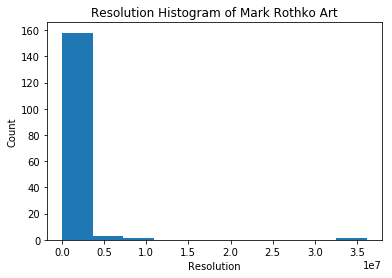

In [299]:
plt.hist(df['Width']*df['Height'])
plt.xlabel('Resolution')
plt.ylabel('Count')
plt.title('Resolution Histogram of Mark Rothko Art')
plt.show()

__P2-P4. Distribution of Mean Hue, Saturation, Value__

Next plot histograms of mean hue, saturation, and value, and dislpay inline below

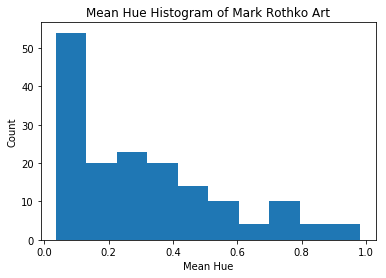

In [298]:
plt.hist(df['Hue_mean'])
plt.xlabel('Mean Hue')
plt.ylabel('Count')
plt.title('Mean Hue Histogram of Mark Rothko Art')
plt.show()

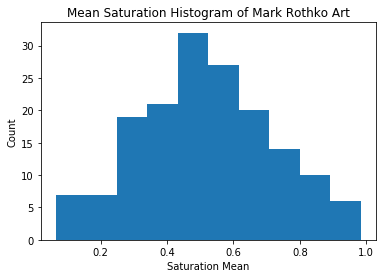

In [300]:
plt.hist(df['Sat_mean'])
plt.xlabel('Saturation Mean')
plt.ylabel('Count')
plt.title('Mean Saturation Histogram of Mark Rothko Art')
plt.show()

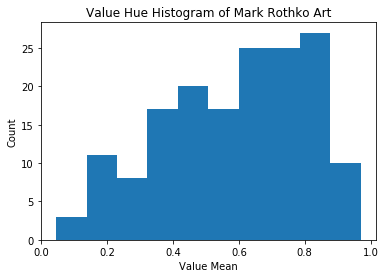

In [301]:
plt.hist(df['Bright_mean'])
plt.xlabel('Value Mean')
plt.ylabel('Count')
plt.title('Value Hue Histogram of Mark Rothko Art')
plt.show()

__P5. Scatterplot with matplotlib (mean value vs. mean hue)__

Now produce a simple scatter plot of mean value against mean hue.

(see example notebook on plotting)

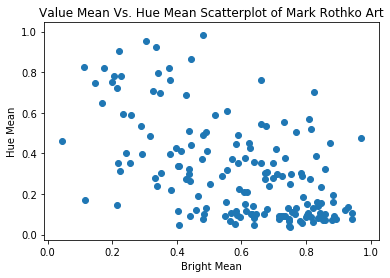

In [302]:
x = df['Bright_mean']
y = df['Hue_mean']
plt.scatter(x,y)
plt.xlabel('Bright Mean')
plt.ylabel('Hue Mean')
plt.title('Value Mean Vs. Hue Mean Scatterplot of Mark Rothko Art')
plt.show()

#### P6-P7. Produce Large Bitmap Figures illustrating your results

(see example notebook on producing large tiled image figures: [../examples/large_figures.ipynb](../examples/large_figures.ipynb))

In [224]:
# from skimage import io
from PIL import Image
import matplotlib.pyplot as plt

##### Step 1: Generate thumbnails from full-resolution scraped images

Write a `make_thumbnail()` function that takes a filename, imagepath, and thumbnail path as arguments

In [225]:
def make_thumbnail(fn, ip, tp):
    filename = os.path.join(ip, fn)
    img = Image.open(filename)
    size = 128,128
    img.thumbnail(size)
    img.save(tp + fn)

Create a folder to store your thumbnails

In [226]:
# Referenced from https://stackabuse.com/creating-and-deleting-directories-with-python/
path = "../data/thumbnails_mark/"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory ../data/thumbnails_mark/ failed


Iterate over your Rothko paintings and write thumbnails to disk

In [227]:
files = [i for i in os.listdir("../data/mark-rothko/")]
image_Path = '../data/mark-rothko/'
thumb_Path = "../data/thumbnails_mark/"
for file in files:
    make_thumbnail(file,image_Path,thumb_Path)
    

##### Step 2: Create large plots on an empty bitmap canvas, placing thumbnails based on feature coordinates.

Make a folder to save result (`../data/mark-rothko/results`)

In [228]:
path_res = "../data/results_mark/"
try:
    os.mkdir(path_res)
except OSError:
    print ("Creation of the directory %s failed" % path_res)
else:
    print ("Successfully created the directory %s " % path_res)

Creation of the directory ../data/results_mark/ failed


Plot mean value vs. mean hue with image thumbnails on large bitmap

In [254]:
import random
# create background image
GLOBAL_WIDTH = 7500
copy_0 = df.copy()
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
# generate random coords (substitute your calculated coordinates for given plot)
num_points = 163
copy_0['Bright_mean'] = (copy_0['Bright_mean']) * GLOBAL_WIDTH
copy_0['Hue_mean'] = (copy_0['Hue_mean']) * GLOBAL_WIDTH
filenames = ["../data/thumbnails_mark/" + i for i in os.listdir("../data/thumbnails_mark")]

In [268]:
copy_0['Bright_mean'] = copy_0['Bright_mean'].astype(int)
copy_0['Hue_mean'] = copy_0['Hue_mean'].astype(int)

coords = list(zip(copy_0['Bright_mean'], copy_0['Hue_mean']))

for i in range(len(coords)):
    thumb_img = Image.open(filenames[i])
    figure.paste(thumb_img, coords[i])

Produce a second plot: mean value vs mean saturation

In [265]:
# create background image
GLOBAL_WIDTH = 7500
copy_1 = df.copy()
bg_color = (192, 192, 192) # gray, you can choose your own
figure1 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
# generate random coords (substitute your calculated coordinates for given plot)
num_points = 163
copy_1['Bright_mean'] = (copy_1['Bright_mean'])*GLOBAL_WIDTH 
copy_1['Sat_mean'] = (copy_1['Sat_mean'])*GLOBAL_WIDTH 

# coords = [(int(random.random()*GLOBAL_WIDTH), int(random.random()*GLOBAL_WIDTH)) for _ in range(num_points)]
# make a list of corresponding thumbnails (random for now, substitute with yours)
filenames = ["../data/thumbnails_mark/" + i for i in os.listdir("../data/thumbnails_mark")]

In [267]:
copy_1['Bright_mean'] = copy_1['Bright_mean'].astype(int)
copy_1['Sat_mean'] = copy_1['Sat_mean'].astype(int)

coords = list(zip(copy_1['Bright_mean'], copy_1['Sat_mean']))


for i in range(len(coords)):
    thumb_img = Image.open(filenames[i])
    figure1.paste(thumb_img, coords[i])

Display the figures inline in this notebook

In [260]:
figure.save('../data/results_mark/value_hue.jpg')
figure1.save('../data/results_mark/value_sat.jpg')

Text(0.5, 1.0, 'Mean Value vs. Mean Hue')

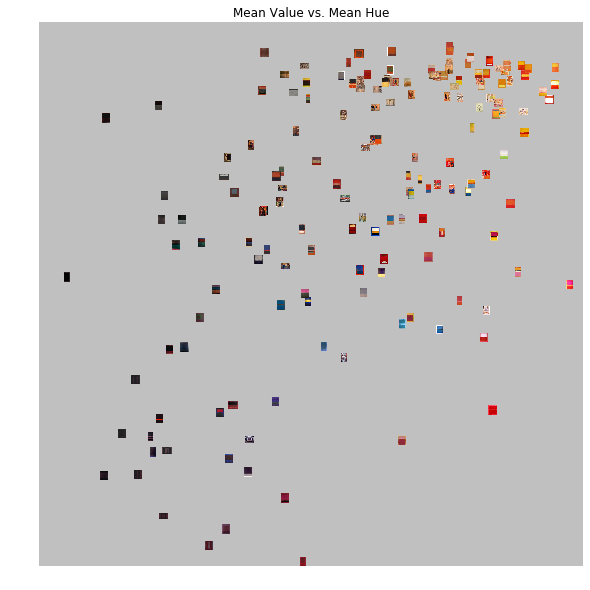

In [264]:
image1 = plt.imread("../data/results_mark/value_hue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image1)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value vs. Mean Hue")

Text(0.5, 1.0, 'Mean Value vs. Mean Saturation')

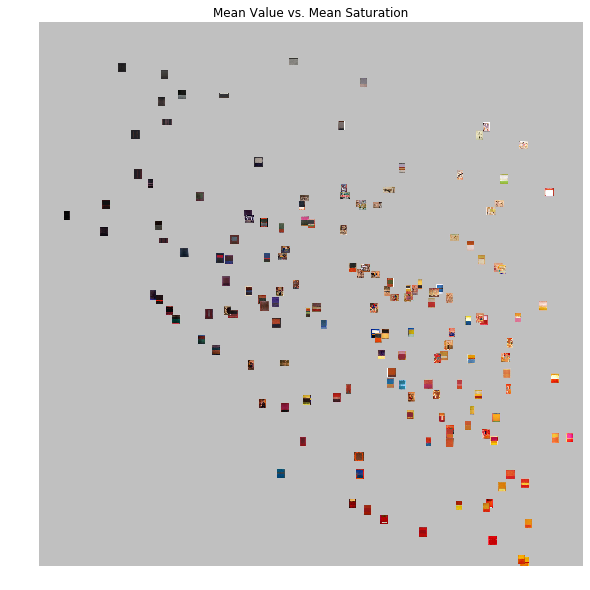

In [269]:
image2 = plt.imread("../data/results_mark/value_sat.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image2)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value vs. Mean Saturation")

## Part 2: Extension
(70 points total)

For this part, you will repeat the above image feature summary analysis (mean brightness, mean hue) using a dataset of your choice. Your data should have approximately n <= 100 images. Your output should be a similar tiled image as produced in the previous section, along with a short paragraph describing your results and why they are interesting.

 ### 2A. Scraping/downloading your new imagery
 (10 points)

In [144]:
DATA_DIR = '../data/'
ARTIST_URL = 'https://www.wikiart.org/en/{artist}/all-works/text-list'
PAINTING_URL = 'https://www.wikiart.org{painting_path}'

In [145]:
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [146]:
artist_name = 'keith-haring'
url_query = ARTIST_URL.format(artist=artist_name)
artist_page = requests.get(url_query)

In [147]:
# check for request error
try:
    artist_page.raise_for_status()
except requests.exceptions.HTTPError as e:
    print("Error trying to retrieve {}".format(artist_page.url))
    raise e

soup = BeautifulSoup(artist_page.text, 'lxml')

In [148]:
IMAGE_DIR = os.path.join(DATA_DIR, artist_name)
if not os.path.exists(IMAGE_DIR):
    os.makedirs(IMAGE_DIR)

In [149]:
painting_paths = []

# retreive all rows in painting-list
for li in soup.find_all('li', {'class': 'painting-list-text-row'}):

    # retrieve all links in the current row
    for link in li.find_all('a'):
        href = link.get('href')
        # store in dictionary
        painting_paths.append(href)

print(len(painting_paths))

79


In [150]:
for path in painting_paths:
    painting_path = PAINTING_URL.format(painting_path=path)
    download_and_save(painting_path)

downloading untitled-3.jpg: https://uploads7.wikiart.org/00205/images/keith-haring/untitled-3.jpg
downloading untitled-1.jpg: https://uploads7.wikiart.org/00205/images/keith-haring/untitled-1.jpg
downloading untitled-2.jpg: https://uploads7.wikiart.org/00205/images/keith-haring/untitled-2.jpg
downloading untitled.jpg: https://uploads5.wikiart.org/00205/images/keith-haring/untitled.jpg
downloading untitled-1978.jpg: https://uploads1.wikiart.org/00205/images/keith-haring/untitled-1978.jpg
downloading untitled-for-kenny.jpg: https://uploads6.wikiart.org/00205/images/keith-haring/untitled-for-kenny.jpg
downloading untitled-1-1.jpg: https://uploads0.wikiart.org/00205/images/keith-haring/untitled-1-1.jpg
downloading untitled-4.jpg: https://uploads7.wikiart.org/00205/images/keith-haring/untitled-4.jpg
downloading untitled-1981.jpg: https://uploads5.wikiart.org/images/keith-haring/untitled-1981.jpg
downloading subway-04.jpg: https://uploads6.wikiart.org/00205/images/keith-haring/subway-04.jpg


downloading fight-aids-worldwide-1990.jpg: https://uploads8.wikiart.org/images/keith-haring/fight-aids-worldwide-1990.jpg
downloading flowers-iv-1990.jpg: https://uploads7.wikiart.org/images/keith-haring/flowers-iv-1990.jpg
downloading best-buddies-1990.jpg: https://uploads1.wikiart.org/images/keith-haring/best-buddies-1990.jpg
downloading formatfactorykeith-haring2.jpg: https://uploads2.wikiart.org/00159/images/keith-haring/formatfactorykeith-haring2.jpg


### 2B. Calculating image features
(10 points)

Model your features on the above exercise, or incorporate other stats (variance, edge count, etc.)

In [203]:
files = [i for i in os.listdir("../data/keith-haring/")]
cols = ['Height', 'Width', 'Hue_mean', 'Sat_mean', 'Bright_mean']
df_k = pd.DataFrame(columns = cols)
h_k = []
w_k = []
hue_k = []
sat_k = []
bright_k = []

mark_DIR = '../data/keith-haring/'

for file in files:
    stats_k = calc_stats(file)
    h_k.append(stats_k[0])
    w_k.append(stats_k[1])
    hue_k.append(stats_k[2])
    sat_k.append(stats_k[3])
    bright_k.append(stats_k[4])

df_k['Height'] = h_k
df_k['Width'] = w_k
df_k['Hue_mean'] = hue_k
df_k['Sat_mean'] = sat_k
df_k['Bright_mean'] = bright_k
df_k.to_csv('../data/keith-haring.csv')

In [204]:
df_k

,Height,Width,Hue_mean,Sat_mean,Bright_mean
0,368,475,0.238247,0.404630,0.571331
1,347,475,0.460737,0.446473,0.205303
2,409,475,0.273349,0.891475,0.897843
3,545,375,0.218281,0.629139,0.693711
4,535,400,0.157057,0.214400,0.711440
...,...,...,...,...,...
74,803,1024,0.154079,0.844216,0.659480
75,1112,1600,0.253511,0.724632,0.752261
76,613,350,0.319963,0.417374,0.442005
77,683,850,0.133707,0.821659,0.782928


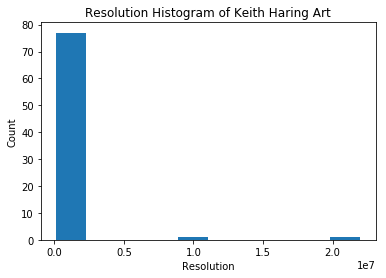

In [303]:
plt.hist(df_k['Width']*df_k['Height'])
plt.xlabel('Resolution')
plt.ylabel('Count')
plt.title('Resolution Histogram of Keith Haring Art')
plt.show()

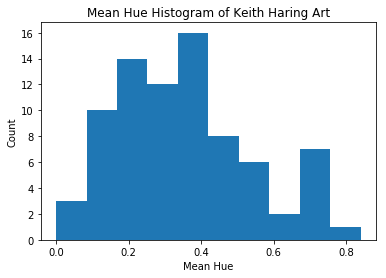

In [304]:
plt.hist(df_k['Hue_mean'])
plt.xlabel('Mean Hue')
plt.ylabel('Count')
plt.title('Mean Hue Histogram of Keith Haring Art')
plt.show()

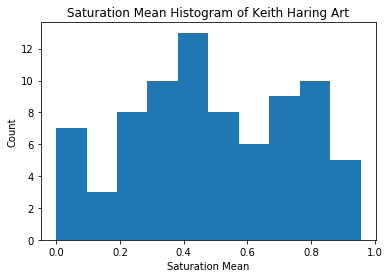

In [305]:
plt.hist(df_k['Sat_mean'])
plt.xlabel('Saturation Mean')
plt.ylabel('Count')
plt.title('Saturation Mean Histogram of Keith Haring Art')
plt.show()

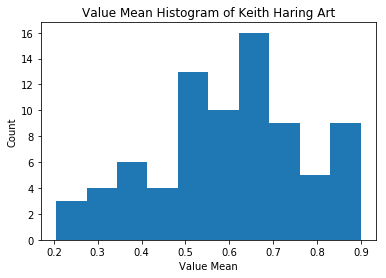

In [306]:
plt.hist(df_k['Bright_mean'])
plt.xlabel('Value Mean')
plt.ylabel('Count')
plt.title('Value Mean Histogram of Keith Haring Art')
plt.show()

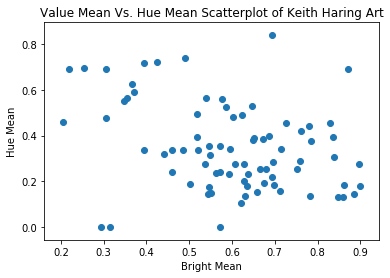

In [307]:
x = df_k['Bright_mean']
y = df_k['Hue_mean']
plt.scatter(x,y)
plt.xlabel('Bright Mean')
plt.ylabel('Hue Mean')
plt.title('Value Mean Vs. Hue Mean Scatterplot of Keith Haring Art')
plt.show()

### 2C. Produce and Display output plots (results)
(25 points)

Produce high resolution results images, and display them inline in the notebook

In [270]:
path = "../data/thumbnails_keith/"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory ../data/thumbnails_keith/ 


In [271]:
files = [i for i in os.listdir("../data/keith-haring/")]
image_Path = '../data/keith-haring/'
thumb_Path = "../data/thumbnails_keith/"
for file in files:
    make_thumbnail(file,image_Path,thumb_Path)

In [272]:
path_res = "../data/results_keith/"
try:
    os.mkdir(path_res)
except OSError:
    print ("Creation of the directory %s failed" % path_res)
else:
    print ("Successfully created the directory %s " % path_res)

Successfully created the directory ../data/results_keith/ 


In [284]:
GLOBAL_WIDTH = 7500
copy_k0 = df_k.copy()
bg_color = (192, 192, 192) # gray, you can choose your own
figure_k0 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
# generate random coords (substitute your calculated coordinates for given plot)
num_points = 163
copy_k0['Bright_mean'] = (copy_k0['Bright_mean']) * GLOBAL_WIDTH
copy_k0['Hue_mean'] = (copy_k0['Hue_mean']) * GLOBAL_WIDTH
filenames = ["../data/thumbnails_keith/" + i for i in os.listdir("../data/thumbnails_keith")]

In [285]:
copy_k0['Bright_mean'] = copy_k0['Bright_mean'].astype(int)
copy_k0['Hue_mean'] = copy_k0['Hue_mean'].astype(int)

coords = list(zip(copy_k0['Bright_mean'], copy_k0['Hue_mean']))

for i in range(len(coords)):
    thumb_img = Image.open(filenames[i])
    figure_k0.paste(thumb_img, coords[i])

In [291]:
GLOBAL_WIDTH = 7500
copy_k1 = df_k.copy()
bg_color = (192, 192, 192) # gray, you can choose your own
figure_k1 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
# generate random coords (substitute your calculated coordinates for given plot)
num_points = 163
copy_k1['Bright_mean'] = (copy_k1['Bright_mean']) * GLOBAL_WIDTH
copy_k1['Sat_mean'] = (copy_k1['Sat_mean']) * GLOBAL_WIDTH
filenames = ["../data/thumbnails_keith/" + i for i in os.listdir("../data/thumbnails_keith")]

In [292]:
copy_k1['Bright_mean'] = copy_k1['Bright_mean'].astype(int)
copy_k1['Sat_mean'] = copy_k1['Sat_mean'].astype(int)

coords = list(zip(copy_k1['Bright_mean'], copy_k1['Sat_mean']))

for i in range(len(coords)):
    thumb_img = Image.open(filenames[i])
    figure_k1.paste(thumb_img, coords[i])

In [295]:
figure_k0.save('../data/results_keith/value_hue.jpg')
figure_k1.save('../data/results_keith/value_sat.jpg')

Text(0.5, 1.0, 'Mean Value vs. Mean Hue')

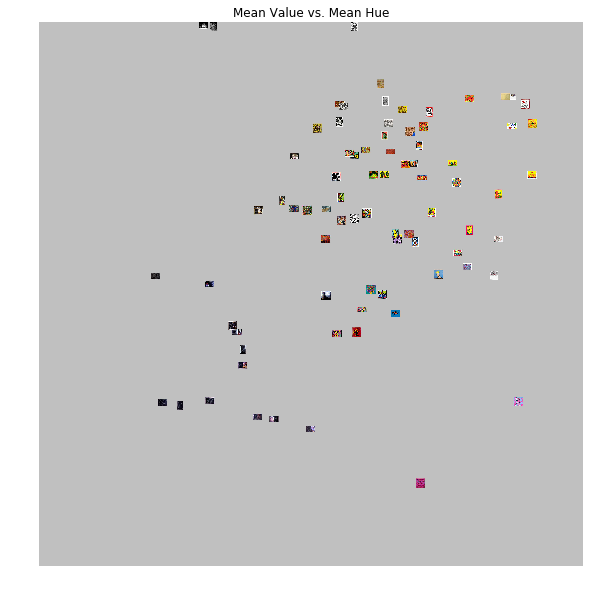

In [296]:
image_k1 = plt.imread("../data/results_keith/value_hue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image_k1)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value vs. Mean Hue")

Text(0.5, 1.0, 'Mean Value vs. Mean Saturation')

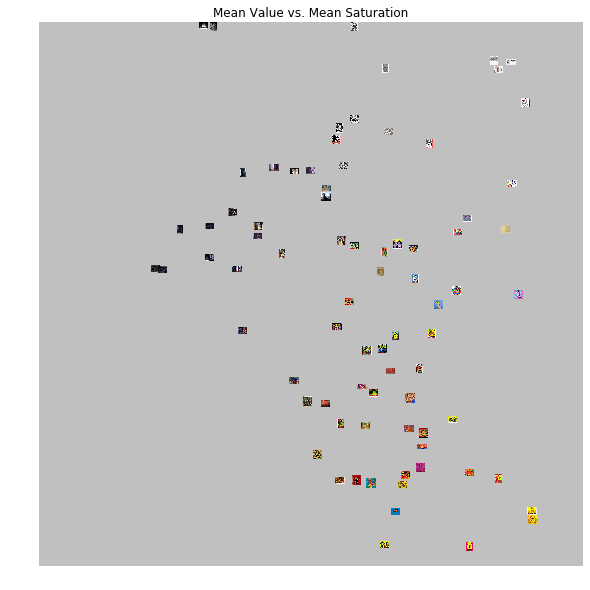

In [297]:
image_k2 = plt.imread("../data/results_keith/value_sat.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image_k2)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value vs. Mean Saturation")

### 2D. Describe your Results
(25 points)

Replace the contents of the markdown cell below with a two paragraph summary of your extension work.

### My Results

I got my images from the WikiArt page for artist Keith Haring, which I gathered by using the same scraping technique used for the Mark Rothko artwork. They are worth studying as Keith Haring's artwork is an interesting look into New York street art from the 1980s, a period that is starting to become more popular today due to retro and vintage artwork becoming more fashionable. Keith Haring's work is often seen to be used by fashion brands among other forms of artistic expression. It is worth studying because it can offer a deeper look into 80s New York street art, and also into modern consumer fashion. 

My results seem to indicate that Keith Haring's artwork tended to use brighter colors, more saturation, and deeper hues. This indicates that Keith Haring's artwork incorporates very bold colors and patterns, something that may point to the popularity of his works in the fashion industry and also gives us a look into 80s street art which from my personal experience shows similar characteristics. This relates to the Rothko's hue selection seems to be similar in that he too often went for deeper hues. However, Rothko's mean saturation seems to be more evenly distributed amongst his artwork. The two are related in that they both can offer a glimpse into the color choices in the mid to late 1900s American art scene. However, despite this, the two represent two very different cultures and art styles. THis can be built upon by looking into these two are perceived in the 2010s and 2020s based on art sale prices, uses in other forms of art, and etc. This era of American art seems to be becoming more popular today, and it can be interesting to look into how these styles perform in today's markets as a way of building upon this research.  

## References

### Additional Cultural Archives:
* [The Getty](https://www.getty.edu/art/collection/) (The J. Paul Getty Museum, LA)
* [The Met Collection](https://www.metmuseum.org/art/collection) (Metropolitan Museum of Art, NYC)
* MoMA (Museum of Modern Art) online collection: [https://www.moma.org/collection/](https://www.moma.org/collection/)
  * Our evolving collection contains almost 200,000 works of modern and contemporary art. More than 85,000 works are currently available online.
* Metropolitan Museum of Art collection on Archive.org: [https://archive.org/details/metropolitanmuseumofart-gallery](https://archive.org/details/metropolitanmuseumofart-gallery?&sort=-downloads&page=2)
* [MoMA exhibition images](https://www.moma.org/collection/) (showing how paintings were installed)
   * read about it here [You Can Now Explore Every MoMA Exhibit Since 1929 for Free Online](https://mymodernmet.com/museum-of-modern-art-exhibition-history/?fbclid=IwAR3LkAPAXmDJ4C9zJn6ujfmhh2zNp6GJL9ysHTMgoKPS5ARp8jx3EklaIUk)
* [Paul Klee notebooks](http://www.kleegestaltungslehre.zpk.org/ee/ZPK/BF/2012/01/01/001/)
  - read about it [here](http://www.openculture.com/2016/03/3900-pages-of-paul-klees-personal-notebooks-are-now-online.html?fbclid=IwAR1_dGLxqy0YAiGuxJD2uTVUiyS0sSJuoX8iKuy_k01LWHbAYcbprNp4hd4)
